In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [2]:
adults = pd.read_csv('D:\\UOJ\\SEMESTER 6\\MACHINE LEARNING\\2017E082_LAB_3\\adult_data.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])
print(format(adults['income'].unique()))
adults_test = pd.read_csv('D:\\UOJ\\SEMESTER 6\\MACHINE LEARNING\\2017E082_LAB_3\\adult_test.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])
print(format(adults_test['income'].unique()))

[' <=50K' ' >50K']
[nan ' <=50K.' ' >50K.']


In [3]:
# check for null and different format data
adults.info()
object_col = adults.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(adults[col].value_counts(dropna=False)/adults.shape[0],'\n')
    
# Convert '?' to NaNs and remove the entries with NaN value
for col in object_col:
    adults.loc[adults[col]=='?', col] = np.nan
    adults_test.loc[adults_test[col]=='?', col] = np.nan
    adults.loc[adults[col]==' ?', col] = np.nan
    adults_test.loc[adults_test[col]==' ?', col] = np.nan

# drop some redundant columns
del_cols = ['fnlwgt','relationship','education']
adults.drop(labels = del_cols,axis = 1,inplace = True)
adults_test.drop(labels = del_cols,axis = 1,inplace = True)
    
# Perform an missing assessment in each column of the dataset.
col_missing_pct = adults.isna().sum()/adults.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
adults = adults.dropna(axis=0, how='any')
adults_test = adults_test.dropna(axis=0, how='any')

# Show the results of the split
print("After removing the missing value:")
print("Training set has {} samples.".format(adults.shape[0]))
print("Testing set has {} samples.".format(adults_test.shape[0]))
print(format(adults['income'].unique()))
print(format(adults_test['income'].unique()))
adults.head()
adults_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ? 

,Age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,7.0,Never-married,Machine-op-inspct,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,9.0,Married-civ-spouse,Farming-fishing,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,12.0,Married-civ-spouse,Protective-serv,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,10.0,Married-civ-spouse,Machine-op-inspct,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,6.0,Never-married,Other-service,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [4]:
#drop income column from train data
train_data = adults.drop('income',axis=1)

#drop income column from test data
test_data = adults_test.drop('income',axis=1)

#merge both test and train data
data = train_data.append(test_data)

# combain both inome from train and test dataset
income = adults['income'].append(adults_test['income'])
income = income.replace(' <=50K', 0).replace(' >50K', 1)
income =income.replace(' <=50K.', 0).replace(' >50K.', 1)
# create data dummy 
data_binary = pd.get_dummies(data)

data_binary.head()

,education_num,capital_gain,capital_loss,hours_per_week,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,13.0,2174.0,0.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,13.0,0.0,0.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.0,0.0,0.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7.0,0.0,0.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13.0,0.0,0.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
data_binary=scaler.fit_transform(data_binary)

#spliting train set and test set
X_train, X_test, y_train, y_test = train_test_split(data_binary,income)

Accuracy 0.8481337343003715%
Precision 0.8021846237500332%
Recall 0.7697573009602128%
F1 0.7835732246022022%


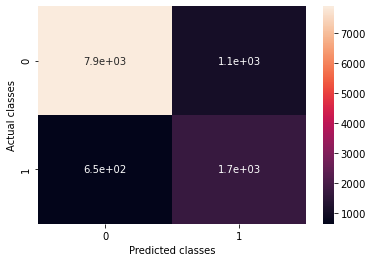

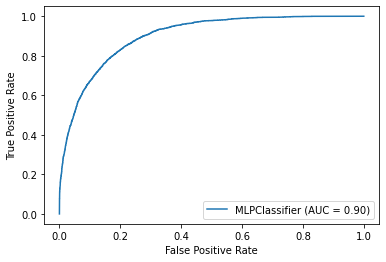

In [6]:
#multi-layer perceptron classifier with 0.0001 learning rate and 100000 iteration
mlp = MLPClassifier(activation='logistic', random_state=2 ,learning_rate_init=0.0001 , max_iter=100000).fit(X_train, y_train)

# prediction of trained data
predicted_classes_MLP = mlp.predict(X_test)

#Accuracy , Precision , recall, F1 scores
accuracy_MLP = accuracy_score(y_test, predicted_classes_MLP)
precision_MLP =precision_score(y_test, predicted_classes_MLP, average='macro')
recall_MLP = recall_score(y_test, predicted_classes_MLP , average='macro')
f1_MLP=f1_score(y_test, predicted_classes_MLP, average='macro')

# Confussion Matrics
cfm_MLP = confusion_matrix(predicted_classes_MLP, y_test)

#print the score 
print('Accuracy {}%'.format(accuracy_MLP))
print('Precision {}%'.format(precision_MLP))
print('Recall {}%'.format(recall_MLP))
print('F1 {}%'.format(f1_MLP))

#show the heat map
sns.heatmap(cfm_MLP, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(mlp, X_test, y_test)
plt.show()

Accuracy 0.8502565009729347%
Precision 0.805236421640655%
Recall 0.7729911458475376%
F1 0.7867744766223781%


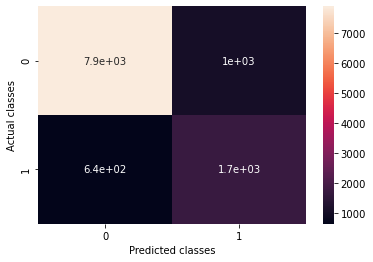

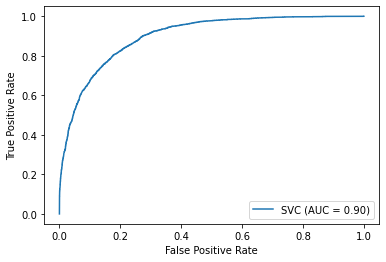

In [7]:
#SVM Classifier with linear kernel
svc = svm.SVC(kernel ='linear')

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()

Accuracy 0.8391119759419777%
Precision 0.7896688090329709%
Recall 0.7545207001040359%
F1 0.7691202754945492%


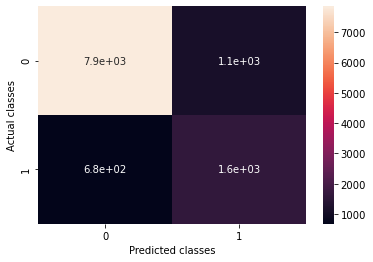

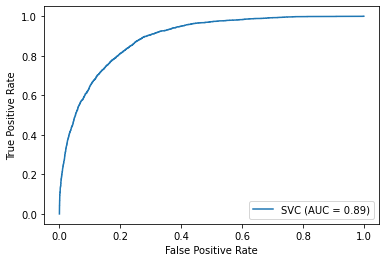

In [8]:
#SVM Classifier with linear kernel C=0.1
svc = svm.SVC(kernel ='linear' , C=0.1)

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()

Accuracy 0.8210684592251901%
Precision 0.7611392565445224%
Recall 0.7335524197495316%
F1 0.745212502189646%


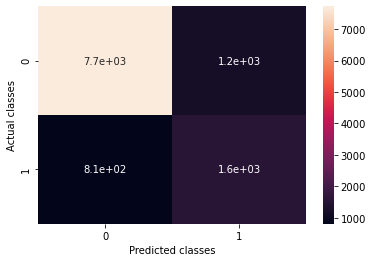

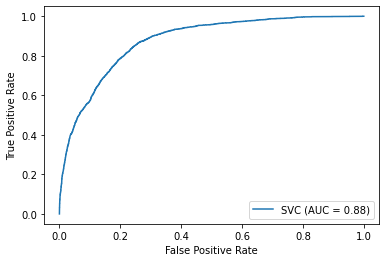

In [9]:
#SVM Classifier with linear kernel C=0.01
svc = svm.SVC(kernel ='linear' , C=0.01)

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()

Accuracy 0.7798514063329206%
Precision 0.8114892910733755%
Recall 0.5585612092098745%
F1 0.5444841437191695%


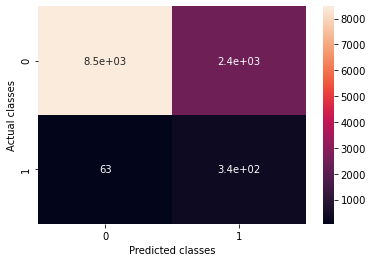

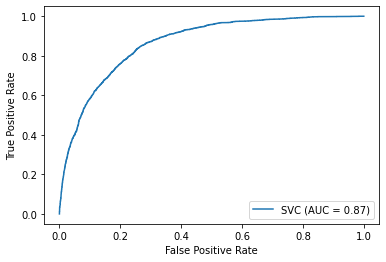

In [10]:
#SVM Classifier with linear kernel C=0.001
svc = svm.SVC(kernel ='linear' , C=0.001)

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()

Accuracy 0.8504333981956483%
Precision 0.8049762440845138%
Recall 0.7744487480912126%
F1 0.7876092472363212%


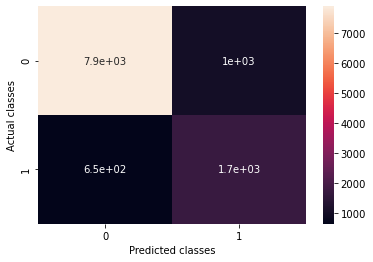

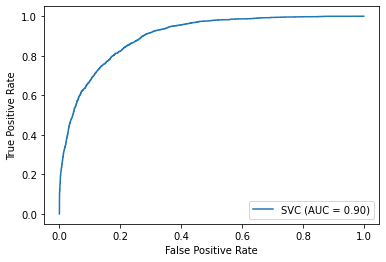

In [11]:
#SVM Classifier with linear kernel C=10
svc = svm.SVC(kernel ='linear' , C=10)

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()

Accuracy 0.8504333981956483%
Precision 0.8049762440845138%
Recall 0.7744487480912126%
F1 0.7876092472363212%


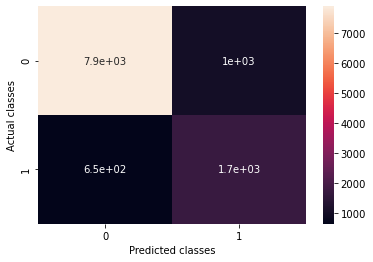

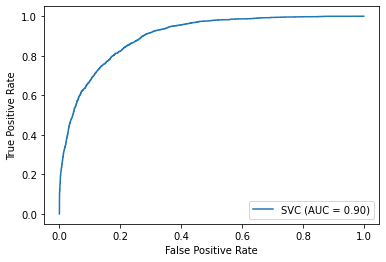

In [12]:
#SVM Classifier with linear kernel C=100
svc = svm.SVC(kernel ='linear' , C=10)

svc=svc.fit(X_train, y_train)
predict_svm=svc.predict(X_test)
accuracy_SVM = accuracy_score(y_test, predict_svm)
precision_SVM =precision_score(y_test, predict_svm, average='macro')
recall_SVM = recall_score(y_test, predict_svm , average='macro')
f1_SVM=f1_score(y_test, predict_svm, average='macro')

print('Accuracy {}%'.format(accuracy_SVM))
print('Precision {}%'.format(precision_SVM))
print('Recall {}%'.format(recall_SVM))
print('F1 {}%'.format(f1_SVM))

# Confussion Matrics
cfm_svc = confusion_matrix(predict_svm, y_test)

#show the heat map
sns.heatmap(cfm_svc, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

#plot Roc Curve with Area under the curve 
plot_roc_curve(svc, X_test, y_test)
plt.show()